<a target="_blank" href="https://colab.research.google.com/github/univai-community/basicml/blob/main/ClassificationWithLogisticRegression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Classification: the basic ideas

In [ ]:
# only run if on colab
!git init; git remote add origin https://github.com/univai-community/basicml.git; git pull origin main

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

We first create some data. This is one of the beauties of python libraries like `sklearn`. There are easy facilities to generate data: this enables us to use *simulation* to answer basic questions. This is a very powerful **experimental** way of learning.

In [3]:
X, y = make_blobs(n_samples=100, centers= np.array([[-1],[1]]), n_features=1, shuffle=True, random_state=2017)

We are creating a classification problem. So we'll generate some data around $x=-1$ and $x=1$ with different y values. Can we classify this data?

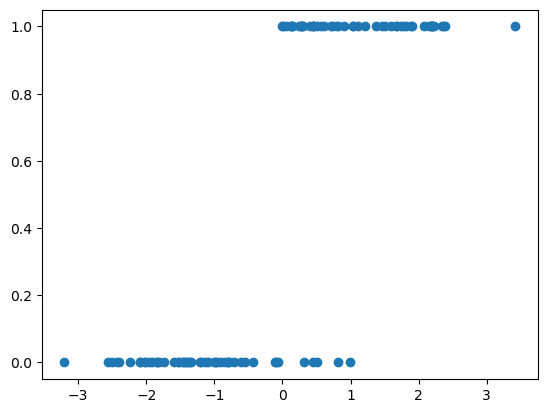

In [4]:
plt.scatter(X,y)

## Fitting curves is a key idea of machine learning

You have probably heard of linear regression. Lets say you have some data which looks like the red dots in the image below:

![](images/linreg.png)

The basic idea in linear regression is to fit a line to this data. So you eyeball the red line in the image above to be the "best fit" line?

What visual algorithm are your eyes using?

What you are doing is minimizing a **Loss Function**: the distance between a given line and the data points as shown by the thin black lines in the figure above. In mathematical notation you would write this as:

$${\cal L} =  \frac{1}{N}\sum_{i = 1}^{N} (y_i - (m\,x_i + b))^2 $$

Now, your job is to find slope $m$ and intercept $b$ to minimize ${\cal L}$. The standard way to do this is calculus.

You dont have to use a line. You could use a neural network function, a sine curve, or anything really: you just need to find its *parameters*, like the slope and intercept in the linear regression case.

This **fitting** is one of the *key ideas* of machine learning.

### Ok, so why not use a line to fit our data

Let us use a line to fit our data. I know, it does not use very "liney", but lets play, shall we?

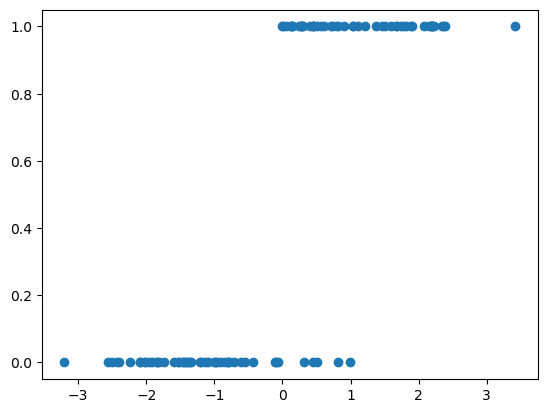

In [60]:
plt.scatter(X,y)

The `sklearn` library makes this very easy for us. We first import the `LinearRegression` module.

In [30]:
from sklearn.linear_model import LinearRegression

Notice that `X` must be 2-D, even if there is only one independent variable, or **feature**. This is to accommodate the usual case in machine learning where there are tons of features.

In [64]:
X

array([[ 1.89574884e+00],
       [ 7.79920722e-01],
       [-1.81726253e+00],
       [ 1.21276995e+00],
       [ 1.67422499e+00],
       [ 1.41544256e-01],
       [ 5.62827432e-01],
       [-1.84860918e+00],
       [ 3.06666159e-01],
       [ 7.25188274e-01],
       [-1.14213621e-01],
       [-7.17207488e-02],
       [-1.52824237e+00],
       [-5.55178535e-01],
       [ 2.75331995e-01],
       [-2.02294529e+00],
       [ 1.36476556e-01],
       [ 1.03133165e+00],
       [ 1.67705620e+00],
       [-1.35285906e+00],
       [ 4.71515882e-02],
       [ 9.88930042e-01],
       [-2.08933018e+00],
       [ 2.66876509e-01],
       [ 9.01562268e-01],
       [-1.01124513e+00],
       [ 1.03225343e+00],
       [-7.85546580e-01],
       [ 2.19533418e+00],
       [-1.48253414e+00],
       [ 4.46924733e-01],
       [-8.81973943e-02],
       [ 1.10784411e+00],
       [ 1.59405599e+00],
       [ 2.90456617e-01],
       [-8.51487191e-01],
       [-9.78157662e-01],
       [ 2.41916537e-01],
       [ 2.2

The key method in `sklearn` id `fit`. We fit the `X, y` data to find its parameters.

In [65]:
lr = LinearRegression().fit(X,y)

In [66]:
lr.intercept_, lr.coef_ # second is an array as there could be more

(0.5069832084244251, array([0.27309061]))

We can use the **fit** `LinearRegression` instance to now predict. We'll predict on a grid of values..

In [62]:
xgrid = np.linspace(-3.5,3.5, 1000)
Xgrid = xgrid.reshape(-1,1)
Xgrid[:10]

array([[-3.5       ],
       [-3.49299299],
       [-3.48598599],
       [-3.47897898],
       [-3.47197197],
       [-3.46496496],
       [-3.45795796],
       [-3.45095095],
       [-3.44394394],
       [-3.43693694]])

In [67]:
yp = lr.predict(Xgrid)

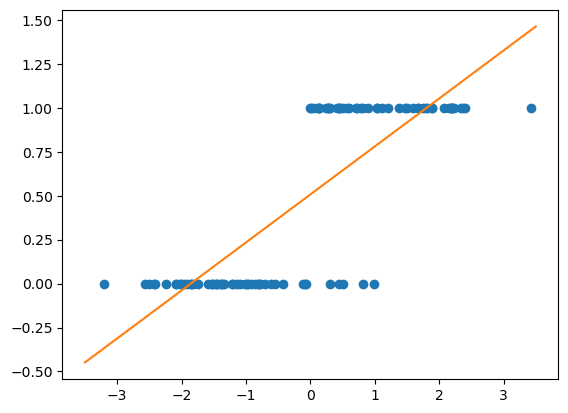

In [68]:
plt.plot(X,y,'o')
plt.plot(xgrid, yp)

Ok so this looks quite bad! But how might you classify using this linear regression?

## Maximum Likelihood: maximize total probability

Lets think of this problem in a more principled way. Let us model the probability that $y=1$ or that $y=0$. This probability will, as you might guess, depend on some parameters. And it will be our job to find these parameters. How might we use these probabilities to do that? The answer lies in a technique called **Maximum Likelihood**.

![](images/gaussmle.png)

Take a look at the 3 red data points.

Which probability curve maximizes the probability of these 3 data points? The blue one or the green one?

We can answer this question by drawing a line (thin rectangle around the line really) from the data points to the probability distributions. The longer the line, the more the probability of each data point from the given probability distribution.

But one point isnt enough, we must take the entire dataset.

Now you know that if things are independent, the total probability of them happening is the product of the individual probabilities. So the probability of the entire dataset is the product (greek letter $\prod$) of the individual probabilities:

$$p_{total} = p_1 p_2 p_3 =\prod_{i=1}^3 p_i$$

For our dataset of 3 points, is blue better? Or green better? Which one has the "maximum likelihood"?

## Modeling the probability: the Sigmoid function

The sigmoid function is a very special function: it maps its input to the tange 0 to 1.

This function is plotted below:

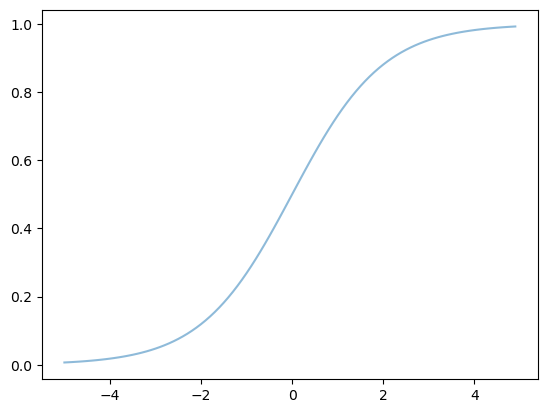

In [36]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

$$\renewcommand{\v}[1]{\mathbf #1}$$

As $z$ gets large, $e^{-z}$ gets close to 0, and the sigmoid approaches 1. As $z$ gets large and negative, $e^{-z}$ gets very large as well, and the sigmoid approaches 0. In-between, when $z=0$, the sigmoid approached 0.1.

In other words, it behaves nicely as a probability.

Now, we'll use the notation $\v{w}\cdot\v{x}$ to present our linear function $mx +b$. Here $\cdot$ means the dot-product and we identify:

$$\begin{eqnarray}
\v{w} &=& (m, b) \\
\v{x} &=& (x, 1)
\end{eqnarray}$$

This notation helps to generalize easily to more than one feature.

Now $mx+b$ becomes $\v{w}\cdot\v{x}$.

Identify: 

$$z = \v{w}\cdot\v{x}$$ 

and the sigmoid

$$h(\v{w}\cdot\v{x})$$

with the probability that the sample is a '1' ($y=1$).

In other words, "Squeeze" linear regression through a **Sigmoid** function and this bounds the output to be a probability

Then, the "conditional" probabilities of $y=1$ or $y=0$ given a particular sample's features $\v{x}$ are:

$$\begin{eqnarray}
P(y=1 | \v{x}) &=& h(\v{w}\cdot\v{x}) \\
P(y=0 | \v{x}) &=& 1 - h(\v{w}\cdot\v{x}).
\end{eqnarray}$$

These two can be written together as

$$P(y|\v{x}, \v{w}) = h(\v{w}\cdot\v{x})^y \left(1 - h(\v{w}\cdot\v{x}) \right)^{(1-y)} $$

This is called a BERNOULLI distribution!!

Each sample is considered independent of the other, as in our earlier example of the 3 red data points. Thus, multiplying over the samples we get:

$$P(y|\v{x},\v{w}) = P(\{y_i\} | \{\v{x}_i\}, \v{w}) = \prod_{i \in \cal{D}} P(y_i|\v{x_i}, \v{w}) = \prod_{i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}$$

**Maximum likelihood** estimation maximises the **likelihood**, this multiplied probability:

$${\cal L} = P(y \mid \v{x},\v{w}) = P(y|\v{x},\v{w})$$, 

OR, alternately we could maximize the log-likelihood (since log is a monotonic function), $$\renewcommand{\v}[1]{\mathbf #1} \ell = log(P(y \mid \v{x},\v{w}))$$.

Thus

$$\begin{eqnarray}
\ell &=& log\left(\prod_{i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\
                  &=& \sum_{i \in \cal{D}} log\left(h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\
                  &=& \sum_{i \in \cal{D}} log\,h(\v{w}\cdot\v{x_i})^{y_i} + log\,\left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\\
                  &=& \sum_{i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right )
\end{eqnarray}$$

## Making a loss and minimizing: Logistic Regression

The negative of this log likelihood (NLL), also called *cross-entropy*.

$$NLL = - \sum_{y_i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right )$$


This is a loss! It can be minimized instead!!! Just like the squared-error loss we had for regression....

And we are still minimizing with respect to the parameters $\v{w}$ like we did before: ie the slope and intercept of the linear function. But keep in mind that out linear function is now wrapped with a sigmoid to get a probability!

This process is now called **Logistic Reegression**. This idea is a cornerstone of classification. Indeed in complex Neural Networks one replaces the linear function by a complex neural network with tons of parameters before doing a minimization. Conceptually that is all there is to neural networks for classification, really!

### Logistic Regression with `sklearn`

For reasons of regularization, the concept of which is outside the scope of this article, `sklearn` has a **hyperparameter** called `C` which needs to be set. We will just set it to be very high for now. The `sklearn` technology is identical to what we learned for linear regression:

In [69]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C=10000)
logr.fit(X,y)

Once again we can get the parameters

In [71]:
logr.coef_, logr.intercept_

(array([[3.31636935]]), array([-0.08788333]))

And make predictions:

In [72]:
ypred = logr.predict(X)
yp2 = logr.predict(Xgrid)

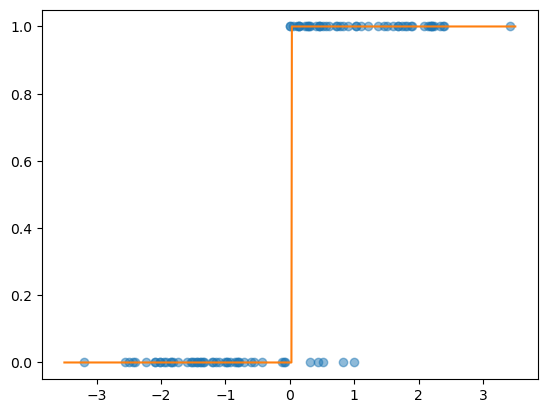

In [73]:
plt.plot(X,y,'o', alpha=0.5)
plt.plot(xgrid, yp2)

But because this is Logistic Regression, and it is a technique for classification, `sklearn` has an additional trick up its sleeve. It goves us those sigmoids at each data point, once

In [74]:
logr.predict_proba(Xgrid)

array([[9.99991666e-01, 8.33385525e-06],
       [9.99991470e-01, 8.52978189e-06],
       [9.99991270e-01, 8.73031467e-06],
       ...,
       [1.04079132e-05, 9.99989592e-01],
       [1.01688468e-05, 9.99989831e-01],
       [9.93527171e-06, 9.99990065e-01]])

The second array gives us $h$, the probability of $y=1$ and the first array $1 - h$, the probability of the same data point having $y=0$:

In [75]:
probs = logr.predict_proba(Xgrid)[:,1] # probabilities of y=1, the sigmoids

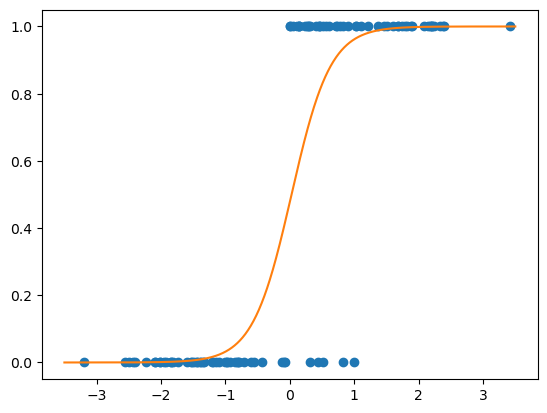

In [76]:
plt.plot(X,y,'o')
plt.plot(xgrid, probs)

### Metrics

Since we know the actual values of the $y$s we can check how we did. This is called the **accuracy** score.

In [16]:
from sklearn.metrics import accuracy_score, log_loss

Here is the accuracy on our dataset:

In [77]:
accuracy_score(y, logr.predict(X))

0.93

What if we wanted to get the NLL, or the cross-entropy loss? `sklearn` makes this easy to get once we have extracted the probabilities:

In [79]:
log_loss(y, logr.predict_proba(X)[:,1])

0.21277985578931183

We can check that this loss was actually minimized by these parameters. Let us let the "slope" parameter vary...

In [80]:
proba = lambda m,x: 1./(1+np.exp(-(m*x + logr.intercept_))) # here is the sigmoid with the slope variable

In [83]:
losses = lambda m: log_loss(y, proba(m, X)) # this constructs the loss as a function of the slope

In [84]:
losses(logr.coef_) # get back the loss at the minimum

0.21277985578931183

Now let us make a grid of "slopes" and see what the losses are:

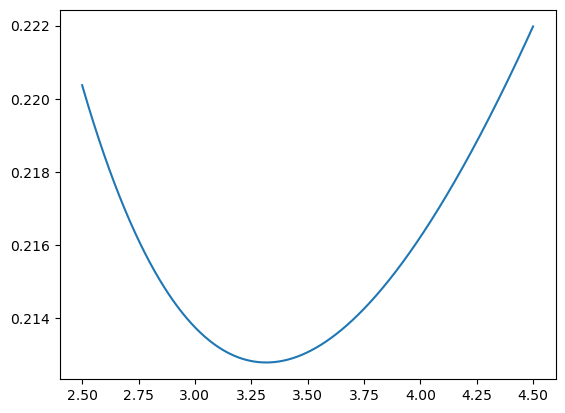

In [85]:
cgrid = np.linspace(2.5,4.5,1000)
plt.plot(cgrid, [losses(c) for c in cgrid])

Sure enough, our fit "slope" and "intercept" minimize the cross-entropy.

### From probabilities to classification

The astute reader might have noticed that logistic regression only models probabilities for us as sigmoids. It does not tell us what to do with them. Yet `sklearn` uses `predict` to make predictions in addition to giving us probabilities using `predict_proba`. What gives?

Going from probabilities to classification is the realm of **decision theory**. This is a complex and fun subject. But here lets just say that `sklearn` uses the intuitive threshold of 0.5 probability to decide if something is $y=1$ or not. I mean if the probability of something being 1 is more than half, then the probability of it not being 1 has to be less than half. So this seems to be a good decision scheme. We can implement it ourselves and check that we get the same accuracy:

In [15]:
ypred = 1*(logr.predict_proba(X)[:,1] >= 0.5)
accuracy_score(y, ypred)

0.93

Why might you not want to use a *threshold* of 0.5? Well, consider the situation in which $y=1$ means that you have cancer. I do not know about you, but if there is a 10% probability I have cancer, get me a biopsy. In this case, you might want to set the classification threshold at 0.1. (Or maybe even lower!!!)